# Project Business Statistics: E-news Express

**Marks: 60**

## Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement.  The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]


## Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

4. Is the time spent on the new page the same for the different language users?


## Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. user_id - Unique user ID of the person visiting the website

2. group - Whether the user belongs to the first group (control) or the second group (treatment)

3. landing_page - Whether the landing page is new or old

4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

5. converted - Whether the user gets converted to a subscriber of the news portal or not

6. language_preferred - Language chosen by the user to view the landing page

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same. Any mathematical or computational details which are a graded part of the project can be included in the Appendix section of the presentation.





### Import all the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Loading the dataset

In [ ]:
# complete the code below to load the dataset
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/abtest.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Explore the dataset and extract insights using Exploratory Data Analysis

### Data Overview

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

#### Displaying the first few rows of the dataset

In [ ]:
# view the first 5 rows of the dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


#### Displaying the last few rows of the dataset

In [ ]:
# view the last 5 rows of the dataset
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


#### Checking the shape of the dataset

In [ ]:
# view the shape of the dataset
df.shape

(100, 6)

#### Checking the data types of the columns for the dataset

In [ ]:
# check the data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [ ]:
df.dtypes

user_id                     int64
group                      object
landing_page               object
time_spent_on_the_page    float64
converted                  object
language_preferred         object
dtype: object

#### Getting the statistical summary for the numerical variables

In [ ]:
# write your code here to print the numerical summary statistics
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


#### Getting the statistical summary for the categorical variables

In [ ]:
# write your code here to print the categorical summary statistics
df.group.value_counts()

control      50
treatment    50
Name: group, dtype: int64

In [ ]:
df.group.value_counts(normalize=True)

control      0.5
treatment    0.5
Name: group, dtype: float64

In [ ]:
df.landing_page.value_counts()

old    50
new    50
Name: landing_page, dtype: int64

In [ ]:
df.landing_page.value_counts(normalize=True)

old    0.5
new    0.5
Name: landing_page, dtype: float64

In [ ]:
df.converted.value_counts()

yes    54
no     46
Name: converted, dtype: int64

In [ ]:
df.converted.value_counts(normalize=True)

yes    0.54
no     0.46
Name: converted, dtype: float64

In [ ]:
df.language_preferred.value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

In [ ]:
df.language_preferred.value_counts(normalize=True)

Spanish    0.34
French     0.34
English    0.32
Name: language_preferred, dtype: float64

### Check for missing values

In [ ]:
# write your code here
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

### Check for duplicates

In [ ]:
# write your code here
duplicateRows = df[df.duplicated()]
duplicateRows

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred


In [ ]:
df.duplicated().sum()

0

### Univariate Analysis

#### Time spent on the page

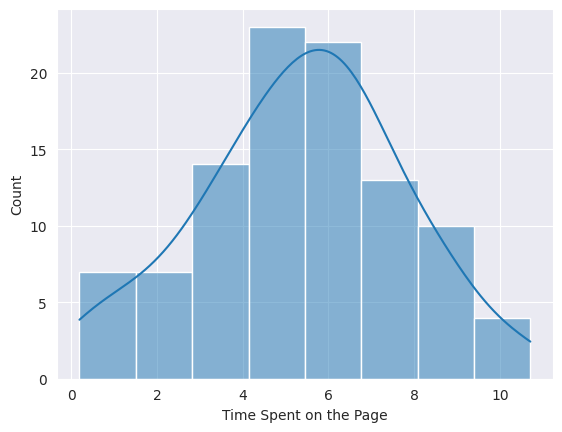

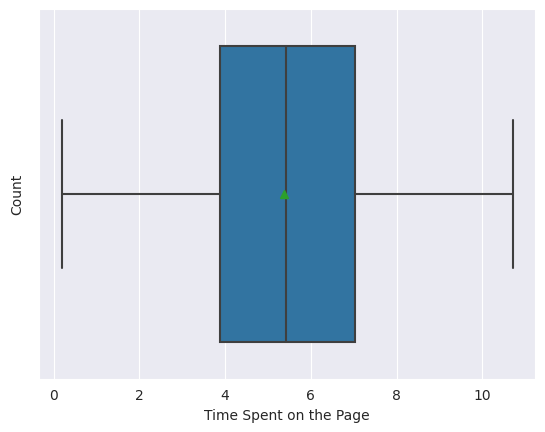

In [ ]:
sns.set_style("darkgrid")
sns.histplot(data=df,x='time_spent_on_the_page', kde=True)
plt.ylabel('Count')
plt.xlabel('Time Spent on the Page')
plt.show()
sns.set_style("darkgrid")
sns.boxplot(data=df,x='time_spent_on_the_page', showmeans = True)
plt.ylabel('Count')
plt.xlabel('Time Spent on the Page')
plt.show()

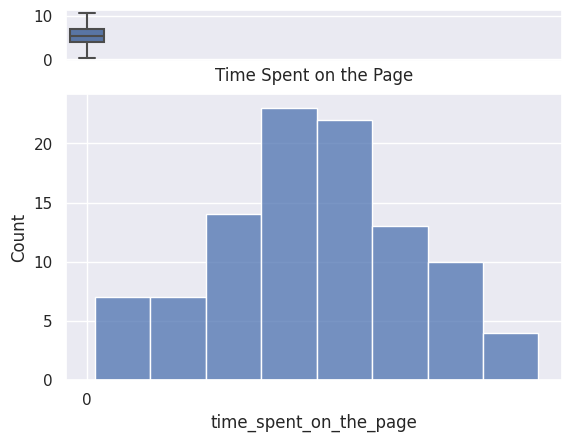

In [ ]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above)
sns.set(style="darkgrid")
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/abtest.csv')

# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(df['time_spent_on_the_page'], ax=ax_box)
sns.histplot(data=df, x="time_spent_on_the_page", ax=ax_hist)

# Remove x axis name for the boxplot
ax_box.set(xlabel='Time Spent on the Page')
plt.show()

#### Group

In [ ]:
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

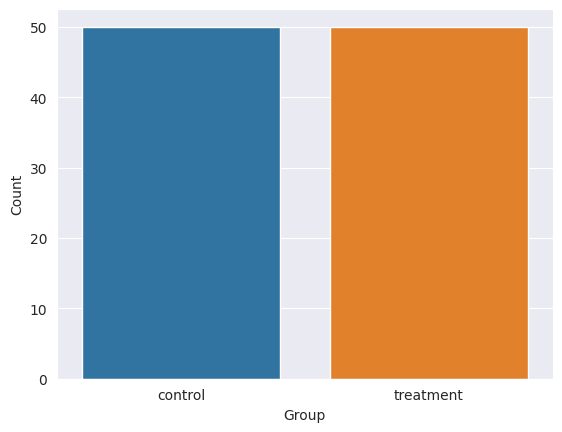

In [ ]:
sns.set_style("darkgrid")
sns.countplot(data=df,x='group')
plt.ylabel('Count')
plt.xlabel('Group')
plt.show()

#### Landing page

In [ ]:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

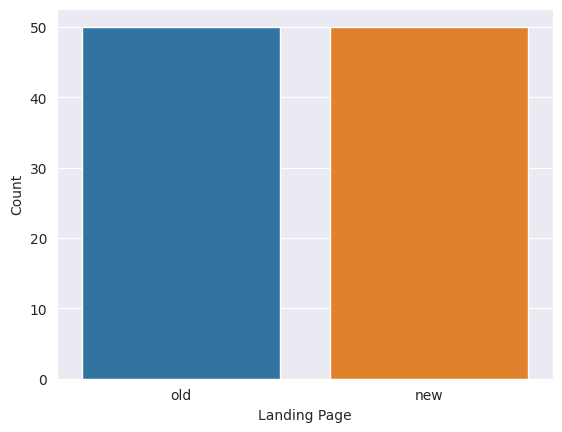

In [ ]:
# complete the code to plot the countplot
sns.set_style("darkgrid")
sns.countplot(data=df,x='landing_page')
plt.ylabel('Count')
plt.xlabel('Landing Page')
plt.show()

#### Converted

In [ ]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

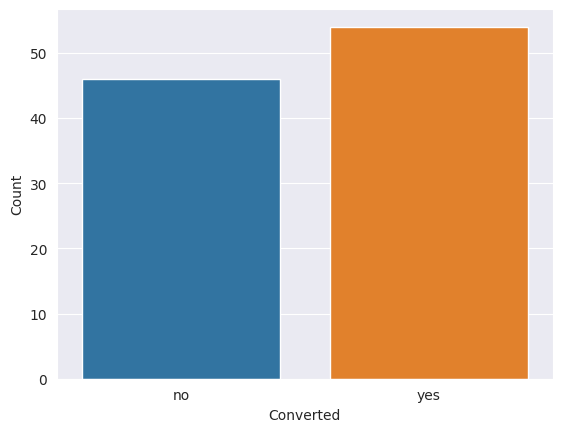

In [ ]:
# complete the code to plot the countplot
sns.set_style("darkgrid")
sns.countplot(data=df,x='converted')
plt.ylabel('Count')
plt.xlabel('Converted')
plt.show()

#### Language preferred

In [ ]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

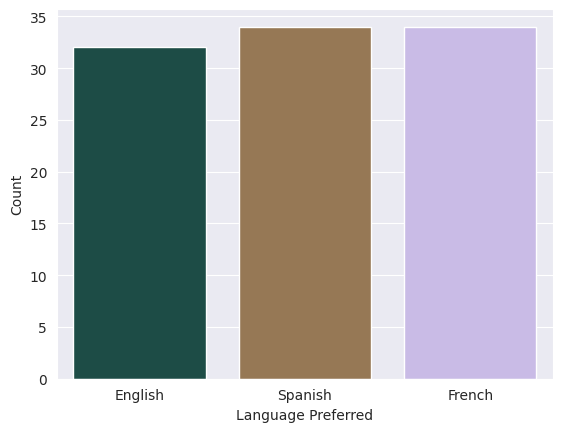

In [ ]:
# complete the code to plot the countplot
sns.set_style("darkgrid")
sns.countplot(data=df,x='language_preferred', palette = 'cubehelix', order = df['language_preferred'].value_counts(ascending=True).index)
plt.ylabel('Count')
plt.xlabel('Language Preferred')
plt.show()

### Bivariate Analysis

#### Landing page vs Time spent on the page

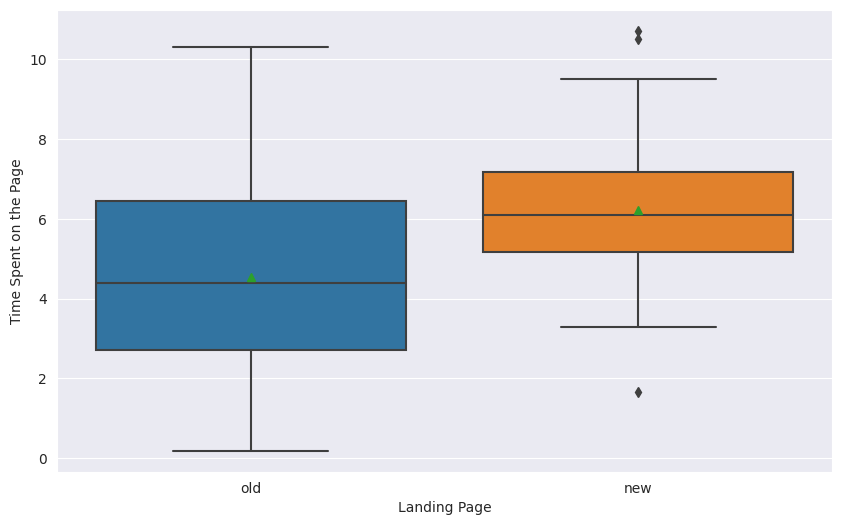

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page', showmeans = True)
plt.ylabel('Time Spent on the Page')
plt.xlabel('Landing Page')
plt.show()

In [ ]:
df.groupby(['landing_page'])['time_spent_on_the_page'].describe()

,count,mean,std,min,25%,50%,75%,max
landing_page,,,,,,,,
new,50.0,6.2232,1.817031,1.65,5.175,6.105,7.1600,10.71
old,50.0,4.5324,2.581975,0.19,2.720,4.380,6.4425,10.30


#### Conversion status vs Time spent on the page

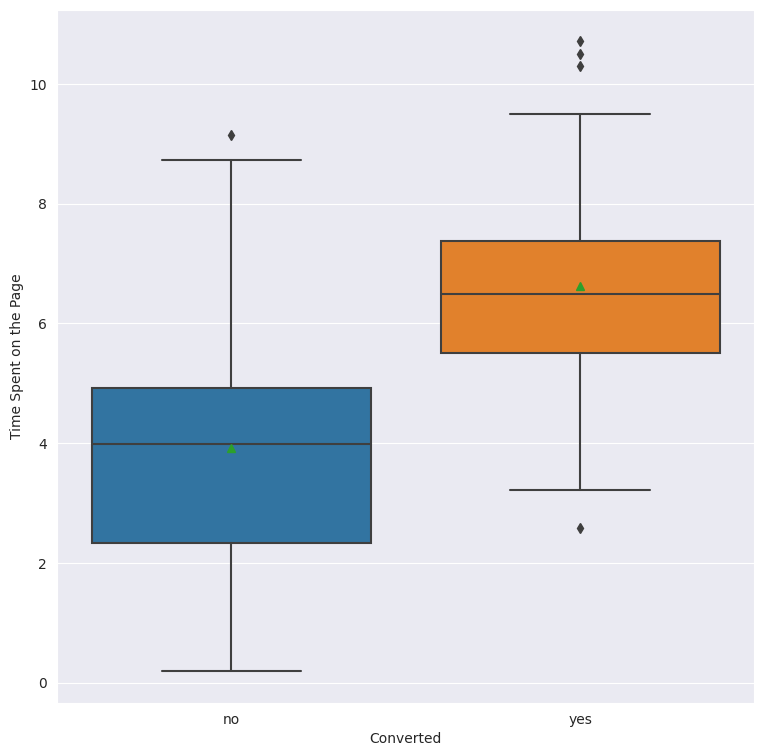

In [ ]:
# complete the code to plot a suitable graph to understand the relationship between 'time_spent_on_the_page' and 'converted' columns
plt.figure(figsize=(9, 9))
sns.set_style("darkgrid")
sns.boxplot(data = df, x = 'converted', y = 'time_spent_on_the_page', showmeans = True)
plt.ylabel('Time Spent on the Page')
plt.xlabel('Converted')
plt.show()

In [ ]:
df.groupby(['converted'])['time_spent_on_the_page'].describe()

,count,mean,std,min,25%,50%,75%,max
converted,,,,,,,,
no,46.0,3.915870,2.226897,0.19,2.3375,3.980,4.9225,9.15
yes,54.0,6.623148,1.708427,2.58,5.5000,6.495,7.3675,10.71


#### Language preferred vs Time spent on the page

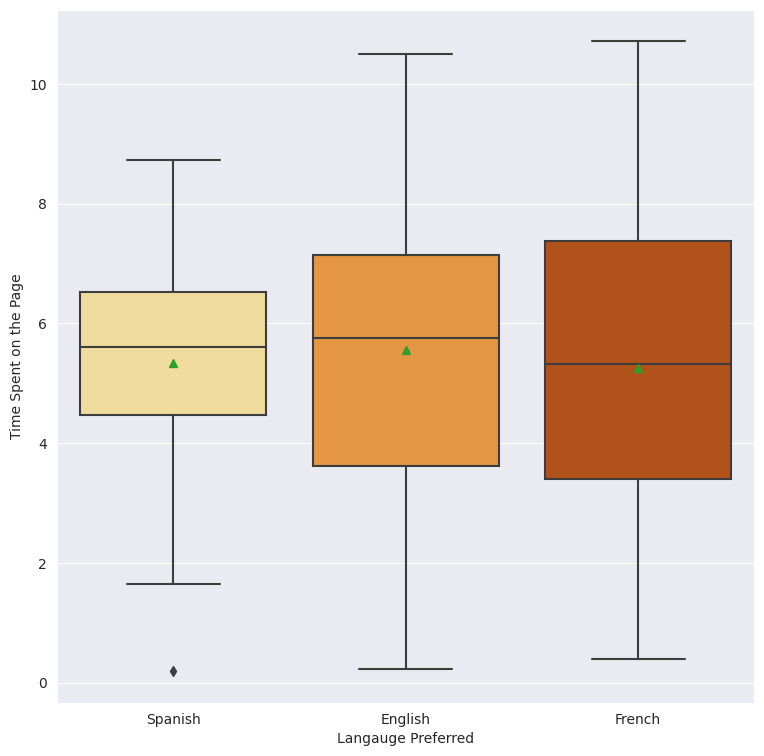

In [ ]:
# write the code to plot a suitable graph to understand the distribution of 'time_spent_on_the_page' among the 'language_preferred'
plt.figure(figsize=(9, 9))
sns.set_style("darkgrid")
sns.boxplot(data = df, x = 'language_preferred', y = 'time_spent_on_the_page', showmeans = True, palette = 'YlOrBr')
plt.ylabel('Time Spent on the Page')
plt.xlabel('Langauge Preferred')
plt.show()

In [ ]:
df.groupby(['language_preferred'])['time_spent_on_the_page'].describe()

,count,mean,std,min,25%,50%,75%,max
language_preferred,,,,,,,,
English,32.0,5.559062,2.621079,0.22,3.6175,5.755,7.1375,10.50
French,34.0,5.253235,2.675413,0.40,3.3950,5.315,7.3675,10.71
Spanish,34.0,5.331765,1.818095,0.19,4.4750,5.605,6.5150,8.72


## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

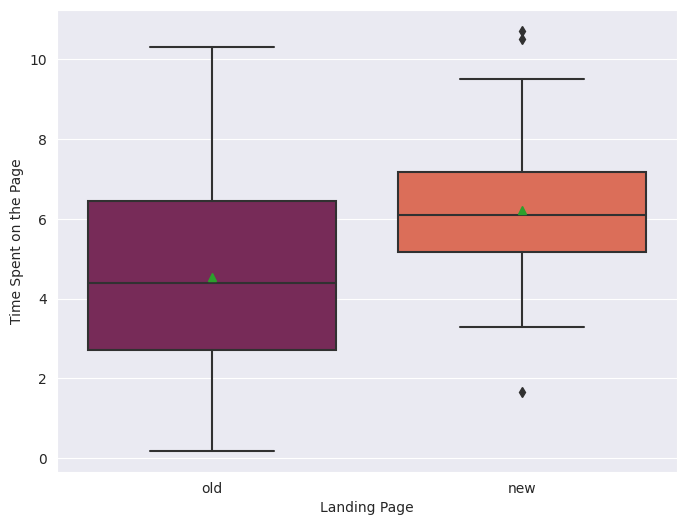

In [ ]:
# visual analysis of the time spent on the new page and the time spent on the old page
plt.figure(figsize=(8,6))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df, palette = 'rocket', showmeans = True)
plt.ylabel('Time Spent on the Page')
plt.xlabel('Landing Page')
plt.show()

In [ ]:
df.groupby(['landing_page'])['time_spent_on_the_page'].mean()

landing_page
new    6.2232
old    4.5324
Name: time_spent_on_the_page, dtype: float64

### Step 1: Define the null and alternate hypotheses

$H_0$: Average users' time spent on the new page is less than or equal to average users' time spent on the old page.

$H_a$: Average users' time spent on the new page is greater than to average users' time spent on the old page.



### Step 2: Select Appropriate test

This is a one-tailed test concerning two population means from two independent populations. The population standard deviations are unknown. **Based on this information, select the appropriate test**.

Based on the parameters provided, the **2-sample independent t-test** would be the most appropriate test.

Assumptions:


*   Continuous data? **Yes** (time spent)
*   Normally distributed populations? **Yes** (see time spent histogram)
* Independent populations? **Yes** (control vs. treatment)
* Random sampling from the population? **Yes** ("experiment by randomly selecting 100 users")


### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [ ]:
# create subsetted data frame for new landing page users
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']

# create subsetted data frame for old landing page users
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page'] ##Complete the code

In [ ]:
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the old page is:', round(time_spent_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the old page is: 2.58


**Based on the sample standard deviations of the two groups, decide whether the population standard deviations can be assumed to be equal or unequal**.

### Step 5: Calculate the p-value

In [ ]:
# complete the code to import the required function
from scipy.stats import ttest_ind

# write the code to calculate the p-value
test_stat, p_value =  ttest_ind(time_spent_new, time_spent_old, equal_var = False, alternative = 'greater')  #complete the code by filling appropriate parameters in the blanks

print('The t-stat is', test_stat)
print('The p-value is', p_value)

The t-stat is 3.7867702694199856
The p-value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Based on the results of the 2-sample independent t-test, we can conclude that the average time spent by users on the new landing page (treatment group) is greater than that of the users on the old landing page (control group).



## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

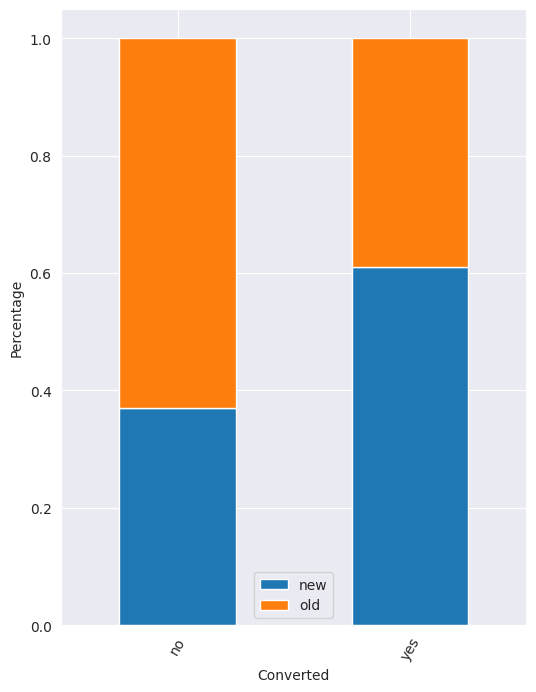

In [ ]:
# complete the code to visually compare the conversion rate for the new page and the conversion rate for the old page
pd.crosstab(df['converted'],df['landing_page'],normalize='index').plot(kind="bar", figsize=(6,8),stacked=True)
plt.ylabel('Percentage')
plt.xlabel('Converted')
plt.xticks(rotation = 60)
plt.legend()
plt.show()

In [ ]:
df.groupby(['landing_page'])['converted'].value_counts()

landing_page  converted
new           yes          33
              no           17
old           no           29
              yes          21
Name: converted, dtype: int64

### Step 1: Define the null and alternate hypotheses

$H_0:$ Conversion rate for new page is less than or equal to conversion rate for old page

$H_a:$ Conversion rate for new page is greater than conversion rate for old page



### Step 2: Select Appropriate test

This is a one-tailed test concerning two population proportions from two independent populations. **Based on this information, select the appropriate test**.

Based on the parameters provided, the **2-sample proportion z-test** would be the most appropriate test.

Assumptions:

* Binomially distributed
populations? Yes (old vs. new & converted vs. not converted)
* Independent populations? Yes (control vs. treatment)
* Random sampling from the population? Yes ("experiment by randomly selecting 100 users")
*Can the binomial distribution approximated to normal distribution? Yes

      np(new) = 50 ⋅ 33/50 = 33 ≥ 10

      n(1−p(new))= 50 ⋅ (50 − 33)/50 = 17 ≥ 10

      np(old) = 50 ⋅ 29/50 = 29 ≥ 10

      n(1−p(old)) = 50 ⋅ (50 − 29)/50 = 21 ≥ 10







### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [ ]:
# calculate the number of converted users in the treatment group
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
# calculate the number of converted users in the control group
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes'] # complete your code here

n_control = df.group.value_counts()['control'] # total number of users in the control group
n_treatment = df.group.value_counts()['treatment'] # total number of users in the treatment group

print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))

The numbers of users served the new and old pages are 50 and 50 respectively


### Step 5: Calculate the p-value

In [ ]:
# complete the code to import the required function
from statsmodels.stats.proportion import proportions_ztest

# write the code to calculate the p-value
test_stat, p_value = proportions_ztest([new_converted, old_converted] , [n_treatment, n_control], alternative = 'larger')   #complete the code by filling appropriate parameters in the blanks

print('The t-stat is', test_stat)
print('The p-value is', p_value)

The t-stat is 2.4077170617153842
The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.016052616408112556 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Based on the results of the 2-sample proportion z-test, we can conclude that the conversion rate of users on the new landing page (treatment group) is greater than that of conversion rate of on the old landing page (control group).



## 3. Does the converted status depend on the preferred language?

### Perform Visual Analysis

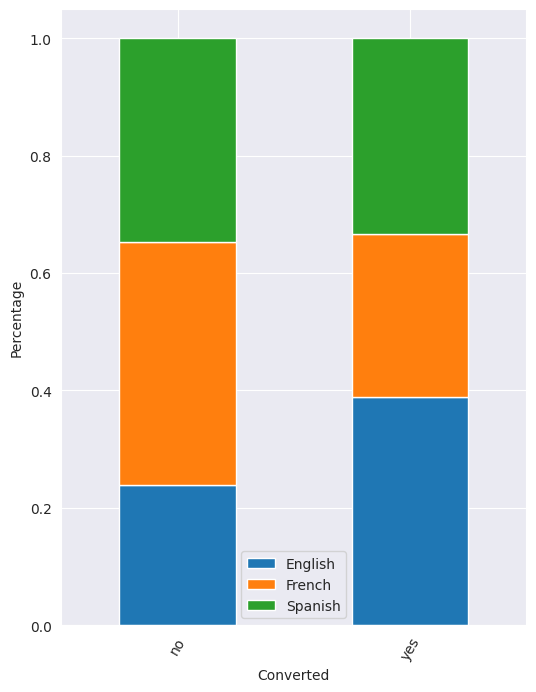

In [ ]:
# complete the code to visually plot the dependency between conversion status and preferred langauge
pd.crosstab(df['converted'],df['language_preferred'],normalize='index').plot(kind="bar", figsize=(6,8), stacked=True)
plt.ylabel('Percentage')
plt.xlabel('Converted')
plt.xticks(rotation = 60)
plt.legend()
plt.show()


In [ ]:
df.language_preferred.value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

In [ ]:
df.groupby(['language_preferred'])['converted'].value_counts(ascending = True)

language_preferred  converted
English             no           11
                    yes          21
French              yes          15
                    no           19
Spanish             no           16
                    yes          18
Name: converted, dtype: int64

### Step 1: Define the null and alternate hypotheses

$H_0:$ User conversion is independent of preferred language

$H_a:$ User conversion is dependent of preferred language



### Step 2: Select Appropriate test

This is a problem of the test of independence, concerning two categorical variables - converted status and preferred language. **Based on this information, select the appropriate test.**

Based on the parameters provided, the **Chi-Square Test for Independence** would be the most appropriate test.

Assumptions:


*   Categorical variables? Yes (language and converted yes or no)
*   Number of sample observations in each
level of the variable is at least 5? Yes (32, 34, 34)
*   Random sampling from the
population? Yes ("experiment by randomly selecting 100 users")





### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [ ]:
# complete the code to create a contingency table showing the distribution of the two categorical variables
contingency_table = pd.crosstab(df['language_preferred'], df['converted'])

contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


### Step 5: Calculate the p-value

In [ ]:
# complete the code to import the required function
from scipy.stats import chi2_contingency

# write the code to calculate the p-value
chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)   # #complete the code by filling appropriate parameters in the blanks

print('The chi squared is', chi2)
print('The p-value is', p_value)
print('The degrees of freedom is', dof)
print('The expected frequency is', exp_freq)

The chi squared is 3.0930306905370832
The p-value is 0.2129888748754345
The degrees of freedom is 2
The expected frequency is [[14.72 17.28]
 [15.64 18.36]
 [15.64 18.36]]


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.2129888748754345 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

Based on the results of the Chi-Square Test for Independence, we do not have enough evidence to suggest that the conversion of the user is dependent upon the user's preferred language.



## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

In [ ]:
# create a new DataFrame for users who got served the new page
df_new = df[df['landing_page'] == 'new']

In [ ]:
df_new['language_preferred'].value_counts()

Spanish    17
French     17
English    16
Name: language_preferred, dtype: int64

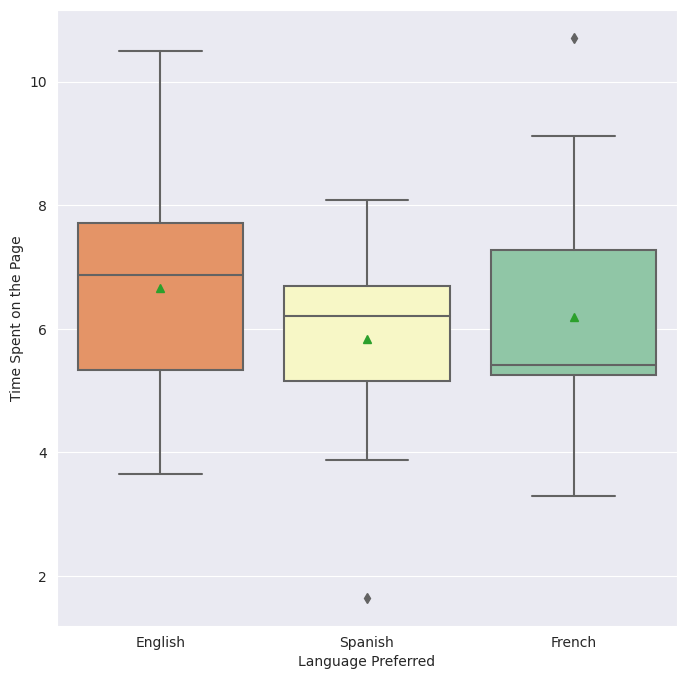

In [ ]:
# complete the code to visually plot the time spent on the new page for different language users
plt.figure(figsize=(8,8))
sns.set_style("darkgrid")
sns.boxplot(x = 'language_preferred', y = 'time_spent_on_the_page', showmeans = True, data = df_new, palette = 'Spectral')
plt.xlabel('Language Preferred')
plt.ylabel('Time Spent on the Page')
plt.show()


In [ ]:
# complete the code to calculate the mean time spent on the new page for different language users
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()


language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

In [ ]:
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].describe()

,count,mean,std,min,25%,50%,75%,max
language_preferred,,,,,,,,
English,16.0,6.663750,1.984150,3.65,5.3275,6.865,7.7125,10.50
French,17.0,6.196471,1.933394,3.30,5.2500,5.420,7.2700,10.71
Spanish,17.0,5.835294,1.525656,1.65,5.1500,6.200,6.7000,8.08


### Step 1: Define the null and alternate hypotheses

$H_0:$ The average time spent on the page for each preferred language is the same

$H_a:$ The average time spent on the page for at least one preferred language is different than the rest



### Step 2: Select Appropriate test

This is a problem, concerning three population means. **Based on this information, select the appropriate test to compare the three population means.**

Based on the parameters provided, the **Analysis of Variance (ANOVA) Test** would be the most appropriate test.

Assumptions:


*   The populations are normally
distributed? Yes (see Shapiro-Wilk's Test results)
*   Samples are independent
simple random samples? Yes (3 language choices)
*   Population variances are equal? Yes (see Levene's Test results)

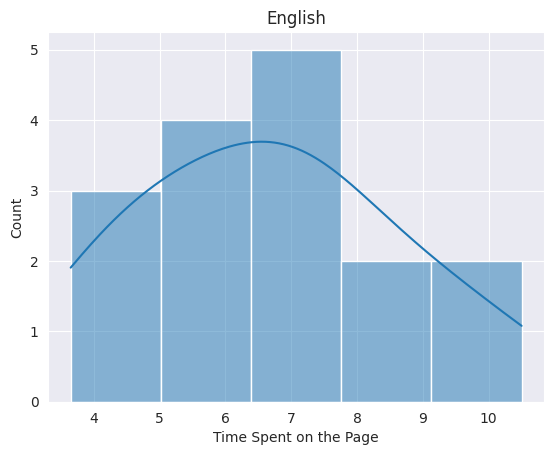

In [ ]:
sns.histplot(data=df_new[df_new['language_preferred'] == 'English'],x='time_spent_on_the_page', kde=True)
plt.title('English')
plt.ylabel('Count')
plt.xlabel('Time Spent on the Page')
plt.show()

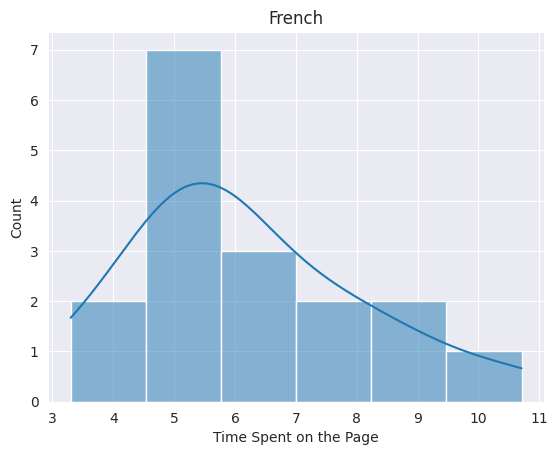

In [ ]:
sns.histplot(data=df_new[df_new['language_preferred'] == 'French'],x='time_spent_on_the_page', kde=True)
plt.title('French')
plt.ylabel('Count')
plt.xlabel('Time Spent on the Page')
plt.show()

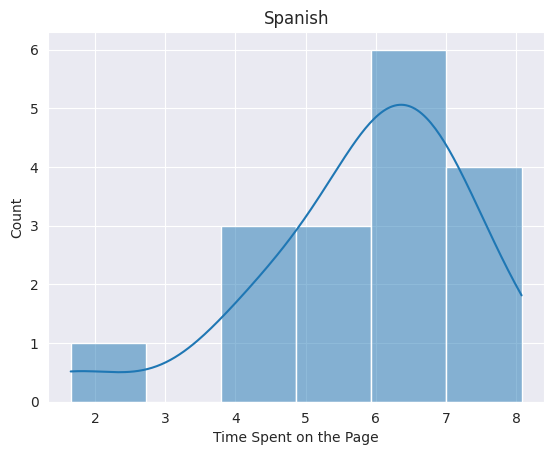

In [ ]:
sns.histplot(data=df_new[df_new['language_preferred'] == 'Spanish'],x='time_spent_on_the_page', kde=True)
plt.title('Spanish')
plt.ylabel('Count')
plt.xlabel('Time Spent on the Page')
plt.show()

### Shapiro-Wilk’s test hypotheses

$H_0:$ Time spent on page follows a normal distribution

$H_a:$ Time spent on page does not follow a normal distribution

In [ ]:
#Shapiro-Wilk's Test
from scipy import stats

w, p_value = stats.shapiro(df_new['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.8040016293525696


In [ ]:
#Shapiro-Wilk's Test - English Only
from scipy import stats

w, p_value = stats.shapiro(df_new['time_spent_on_the_page'][df_new['language_preferred'] == 'English'])
print('The p-value is', p_value)

The p-value is 0.8863451480865479


In [ ]:
#Shapiro-Wilk's Test - French Only
from scipy import stats

w, p_value = stats.shapiro(df_new['time_spent_on_the_page'][df_new['language_preferred'] == 'French'])
print('The p-value is', p_value)

The p-value is 0.3213688135147095


In [ ]:
#Shapiro-Wilk's Test - Spanish Only
from scipy import stats

w, p_value = stats.shapiro(df_new['time_spent_on_the_page'][df_new['language_preferred'] == 'Spanish'])
print('The p-value is', p_value)

The p-value is 0.09006832540035248


Fail to reject the null hypothesis of a normal distribution.

### Levene's test hypotheses

$H_0:$ All the population variances are equal

$H_a:$ At least one variance is different from the rest

In [ ]:
#Levene's Test
from scipy.stats import levene
statistic, p_value = levene( df_new['time_spent_on_the_page'][df_new['language_preferred'] == 'English'],
                                   df_new['time_spent_on_the_page'][df_new['language_preferred'] == 'French'],
                                   df_new['time_spent_on_the_page'][df_new['language_preferred'] == 'Spanish'])

print('The p-value is', p_value)

The p-value is 0.46711357711340173


Fail to reject the null hypothesis of all population variances are equal.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [ ]:
# create a subsetted data frame of the time spent on the new page by English language users
time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
# create subsetted data frames of the time spent on the new page by French and Spanish language users
time_spent_French = df_new[df_new['language_preferred']=='French']['time_spent_on_the_page']   # complete your code here
time_spent_Spanish = df_new[df_new['language_preferred']=='Spanish']['time_spent_on_the_page']   # complete your code here

### Step 5: Calculate the p-value

In [ ]:
# complete the code to import the required function
from scipy.stats import f_oneway

# write the code to calculate the p-value
test_stat, p_value = f_oneway(time_spent_English, time_spent_French, time_spent_Spanish)   #complete the code by filling appropriate parameters in the blanks

print('The f-stat is', test_stat)
print('The p-value is', p_value)

The f-stat is 0.8543992770006822
The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

Based on the results of the ANOVA Test, we do not have enough evidence to suggest that the average user time spent on the new page is different between the three preferred language options.



## Conclusion and Business Recommendations


___